# Data Scientist Associate Practical Exam Submission

First of all, import useful libraries to perform data analysis and data validation. Import the dataframe from the csv file


In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

filename = "university_enrollment_2306.csv"
df = pd.read_csv(filename)
print(df.shape)
df.head()

(1850, 8)


,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,None,Science
2,3,online,2016,257,57.24,80.0,NaN,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science


In [35]:
print('Columns dtypes : ')
print(df.dtypes)
print('\nNumber missing values : ')
print(df.isna().sum())
print(df.isnull().sum())
print('\nNumber unique values : ')
print(df.nunique())

Columns dtypes : 
course_id             int64
course_type          object
year                  int64
enrollment_count      int64
pre_score            object
post_score          float64
pre_requirement      object
department           object
dtype: object

Number missing values : 
course_id             0
course_type           0
year                  0
enrollment_count      0
pre_score             0
post_score          185
pre_requirement      89
department            0
dtype: int64
course_id             0
course_type           0
year                  0
enrollment_count      0
pre_score             0
post_score          185
pre_requirement      89
department            0
dtype: int64

Number unique values : 
course_id           1850
course_type            2
year                  12
enrollment_count      45
pre_score           1594
post_score            53
pre_requirement        3
department             5
dtype: int64


In [36]:
#Checking unique values for some columns

col_to_check = ['course_type','year','pre_requirement','department','post_score']

for col in col_to_check:
    print(df[col].unique())
    print('\n')

['classroom' 'online']


[2018 2020 2016 2013 2019 2014 2021 2022 2011 2015 2012 2017]


['Beginner' 'None' nan 'Intermediate']


['Science' 'Mathematics' 'Technology' 'Math' 'Engineering']


[ 73.  86.  80.  75.  76.  84.  88.  87.  79.  74.  85.  81.  70.  65.
  nan  72.  77.  83.  67.  96.  82.  94.  66.  91.  63.  61.  78.  62.
  90.  69.  60.  71.  95.  68.  54.  64. 105.  57.  98.  55.  56.  59.
  93.  51.  89.  92.  58.  97.  99. 100.  53. 102. 101. 103.]




In [37]:
#Verify why the data type for the pre_score column is 'object' and not float
non_numeric_values = df.loc[~df['pre_score'].str.match(r'^\d+(\.\d+)?$')]
print(non_numeric_values['pre_score'])

15      -
22      -
26      -
27      -
31      -
       ..
1768    -
1771    -
1807    -
1811    -
1844    -
Name: pre_score, Length: 130, dtype: object


In [38]:
# Performing data cleaning and validation :

# Changing dtype of pre_score from object to float
df['pre_score'] = df['pre_score'].replace('-',0)
df['pre_score'] = df['pre_score'].astype('float')

# Replace missing values in post_score to 0
df['post_score'].fillna(0, inplace=True)

# Replace missing values in pre_requirement with None
df['pre_requirement'].fillna('None', inplace=True)

df['department'] = df['department'].replace('Math','Mathematics')

In [39]:
#Checking unique values for some columns

col_to_check = ['course_type','year','pre_requirement','department','post_score']

for col in col_to_check:
    print(df[col].unique())
    print('\n')

['classroom' 'online']


[2018 2020 2016 2013 2019 2014 2021 2022 2011 2015 2012 2017]


['Beginner' 'None' 'Intermediate']


['Science' 'Mathematics' 'Technology' 'Engineering']


[ 73.  86.  80.  75.  76.  84.  88.  87.  79.  74.  85.  81.  70.  65.
   0.  72.  77.  83.  67.  96.  82.  94.  66.  91.  63.  61.  78.  62.
  90.  69.  60.  71.  95.  68.  54.  64. 105.  57.  98.  55.  56.  59.
  93.  51.  89.  92.  58.  97.  99. 100.  53. 102. 101. 103.]




In [40]:
df.head()

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,None,Science
2,3,online,2016,257,57.24,80.0,None,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science


In [41]:
print('Columns dtypes : ')
print(df.dtypes)
print('\nNumber missing values : ')
print(df.isna().sum())
print(df.isnull().sum())
print('\nNumber unique values : ')
print(df.nunique())

Columns dtypes : 
course_id             int64
course_type          object
year                  int64
enrollment_count      int64
pre_score           float64
post_score          float64
pre_requirement      object
department           object
dtype: object

Number missing values : 
course_id           0
course_type         0
year                0
enrollment_count    0
pre_score           0
post_score          0
pre_requirement     0
department          0
dtype: int64
course_id           0
course_type         0
year                0
enrollment_count    0
pre_score           0
post_score          0
pre_requirement     0
department          0
dtype: int64

Number unique values : 
course_id           1850
course_type            2
year                  12
enrollment_count      45
pre_score           1594
post_score            54
pre_requirement        3
department             4
dtype: int64


## Task 1 
At first the dataset contains **1850 rows and 8 columns** with missing values before cleaning. I have validated all the columns against the criteria in the dataset table:

- Course_id: Same as the description, 1850 unique course_id without missing values. So no change was made to this column
- course_type: Same as the description, 2 unique values (clasrroom and online) without missing values. So no change was made to this column
- year: Same as the descritpion, 12 unique values (from 2011 to 2022) without missing values. So no change was made to this column
- enrollment_count: Same as the description, without missing values. So no change was made to this column
- pre_score: 130 missing values : '-' and not the correct column data type. So I replaced them with 0 and converted the column to float data type.
- post_score: 185 missing values, I replaced missing values with 0, as mentioned in the description
- pre_requirement: 89 Missing values. I replaced missing values with 'None' as mentioned in the description
- department: A typo was present in this column, 5 unique categories instead of 4 : 'Science' 'Mathematics' 'Technology' 'Math' 'Engineering'. I replaced 'Math' with 'Mathematics' to match with the data description.

In the end (after the data validation) the dataset contains **1850 rows and 8 columns**

## Task 2
By looking at the **graph 1 Distribution of enrollment counts** we can see that the majority of the courses have more than 235 students enrolled in the course with a peak around 260 with +400 courses. Some others courses have between 150 and 200 students enrolled.

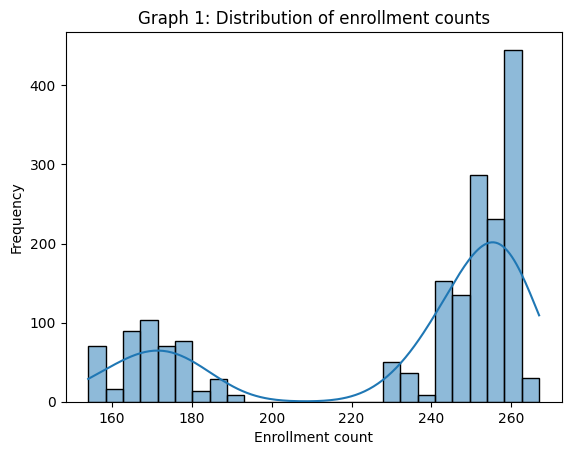

In [42]:
sns.histplot(data = df , x='enrollment_count' , bins = df['enrollment_count'].max()//10, kde = True)
plt.xlabel('Enrollment count')
plt.ylabel('Frequency')
plt.title('Graph 1: Distribution of enrollment counts')
plt.show()

## Task 3
As we can see on the **Graph 2: Count of observation per course_type**
that most of courses are online. Thus the observations aren't really balanced because 75% of the dataset is accross 'Online' course_type.

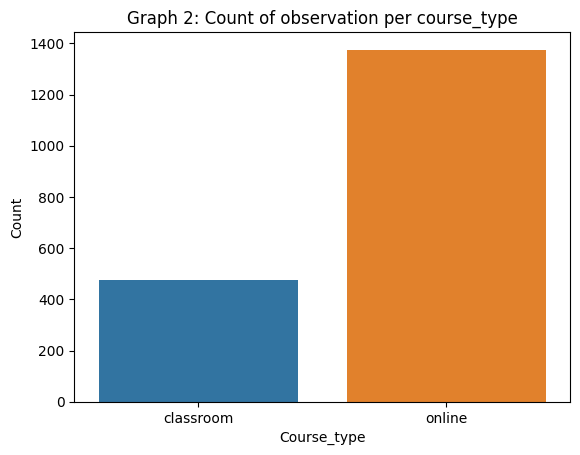

In [43]:
sns.countplot(data = df, x = "course_type")
plt.xlabel('Course_type')
plt.ylabel('Count')
plt.title('Graph 2: Count of observation per course_type')
plt.show()

## Task 4
As shown in the **Graph 4: Enrollment Count Distribution by Course Type**. More people are enrolled in courses if there are online. We can see on the boxplot on the right that the median values approaching **260** peoples for courses online while the median value for courses in classroom is around **170**.

The distribution plot among course_type really emphasize this relationship.

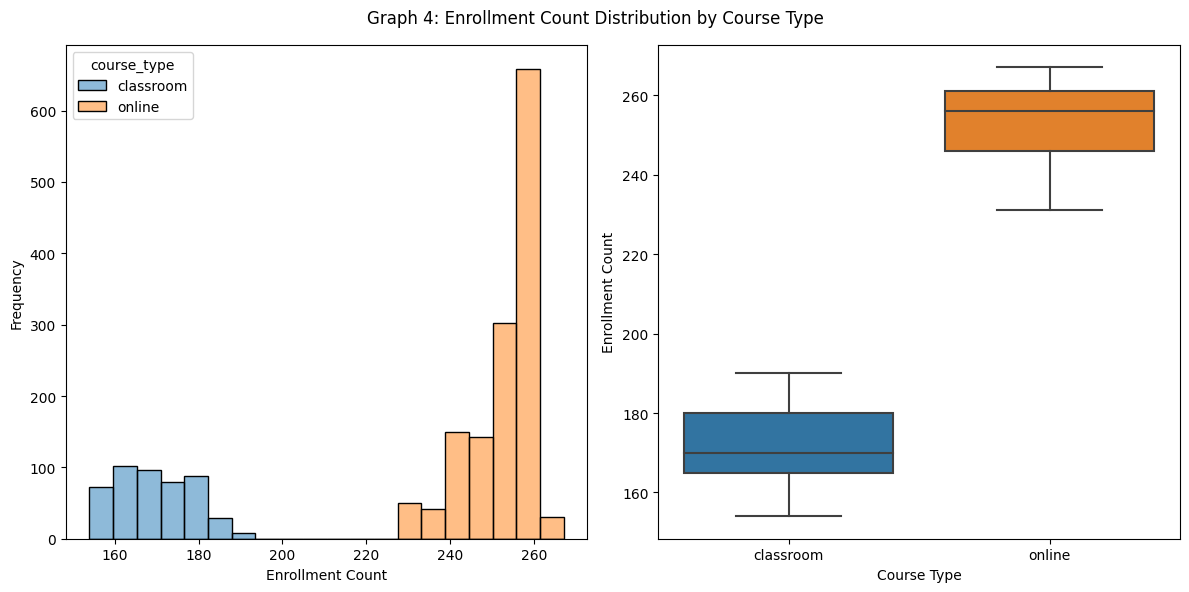

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot a histogram using Seaborn
sns.histplot(data=df, x='enrollment_count', hue='course_type', bins=20, ax=axes[0])
axes[0].set_xlabel('Enrollment Count')
axes[0].set_ylabel('Frequency')

# Plot a box plot using Seaborn
sns.boxplot(data=df, x='course_type', y='enrollment_count', ax=axes[1])
axes[1].set_xlabel('Course Type')
axes[1].set_ylabel('Enrollment Count')

# Adjust layout
plt.suptitle('Graph 4: Enrollment Count Distribution by Course Type')
plt.tight_layout()

## Task 5
The University wants to predict how many students will enroll in a course. Since the enrollment_count column is numerical column this is a **Regression problem** in machine learning

And before applying any machine learning model I need to perform changes such as:
- Convert categorical variables into numeric variables
- Set course_id as index
- Set y to the target variable (enrollment_count) and removed it from the dataframe
- Apply log transformation to the target variable (to avoid skewness)

In [45]:
df.set_index('course_id',inplace=True)
categorical_columns = ['course_type','year','pre_requirement','department']
df_encoded = pd.get_dummies(df,columns = categorical_columns, prefix = categorical_columns)
df_encoded.head()

,enrollment_count,pre_score,post_score,course_type_classroom,course_type_online,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,pre_requirement_Beginner,pre_requirement_Intermediate,pre_requirement_None,department_Engineering,department_Mathematics,department_Science,department_Technology
course_id,,,,,,,,,,,,,,,,,,,,,,,,
1,165,28.14,73.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,175,79.68,86.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,257,57.24,80.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
4,251,97.67,75.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
5,165,39.75,76.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [46]:
print(df_encoded.shape)
y = np.log(df_encoded['enrollment_count']) 
X = df_encoded.drop(columns=['enrollment_count'])
print(f'Shape x : {X.shape} Shape y : {y.shape}')

(1850, 24)
Shape x : (1850, 23) Shape y : (1850,)


In [47]:
# import ML models and performance metrics using sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)
print(f'Shape x_train : {X_train.shape} Shape y_train : {y_train.shape}')
print(f'Shape x_test : {X_test.shape} Shape y_test : {y_test.shape}')

Shape x_train : (1295, 23) Shape y_train : (1295,)
Shape x_test : (555, 23) Shape y_test : (555,)


## Task 6
Fit a Baseline model : Linear Regression

In [49]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

## Task 7
Fit a comparison model - XGBoost

In [50]:
xgb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

## Task 8
I have chosen the Linear Regression model as a baseline model because for me it is the simpler model to train and interpret the results. The comparison model I have chosen is an XGBoost regressor because it can handle complex relationship between features, moreover I find it more powerfull than 'simpler' random forest model as it is often used in the state of the art.

## Task 9
I am chosing **root mean squared error (RMSE)** to evaluate my models because it is easy to interpret because it is using the same unit as my target variable. 

In [51]:
rmse_lr = mean_squared_error(np.exp(y_test),np.around(np.exp(y_pred_lr)), squared = False)

rmse_xgb = mean_squared_error(np.exp(y_test),np.around(np.exp(y_pred_xgb)), squared = False)

print(f'RMSE lr : {rmse_lr} RMSE xgb : {rmse_xgb}')

RMSE lr : 1.4624427300714045 RMSE xgb : 0.34222378222023875


## Task 10
As the RMSE is lower for the XGBoost model It means that the model has smaller errors in prediction. Thus, the XGBoost model is performing better at predicting the number of student that will enroll in a course. However, with 'only' 1.45 as RMSE the Linear Regression is also performing well because on average on the difference between prediction and reality will be about 1.45 enrollments. Knowing that most of the courses have more than 230 students enrolled it would not affect to much the course.